# Color-based Continuum Subtraction


This notebook is for testing an implementation of color-based continuum subtraction based on the method from Matteo Fossati.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
%matplotlib inline
homedir = os.getenv("HOME")
%matplotlib inline

In [2]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/subtract_continuum.py VFID0569-NGC5989-INT-20190530-p002

['legacy/VFID0569-legacy-151-r-ha.fits']
g-r image = legacy/VFID0569-legacy-151-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting 0.00 from r-band image
Subtracting 0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID0569-legacy-151-gr-ha-smooth.fits
telescope =  INT VFID0569-NGC5989-INT-20190530-p002

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18


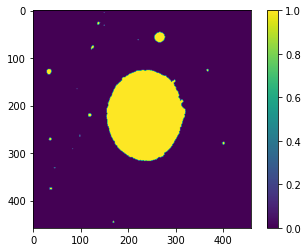

In [27]:
# syntax for usemask was not correct.
# I tried gr_col != np.nan, but this returns all try
# below is the proper way to identify where the nans are
temp = ~np.isnan(gr_col)
plt.imshow(temp)
plt.colorbar()

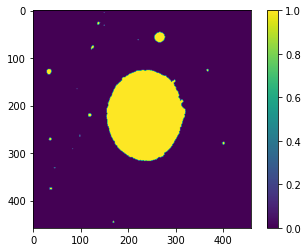

In [24]:
plt.figure()
plt.imshow(usemask)
plt.colorbar()

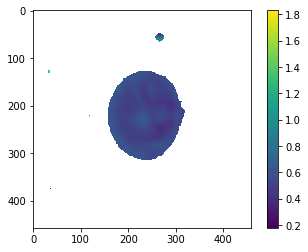

In [26]:
plt.imshow(gr_col)
plt.colorbar()

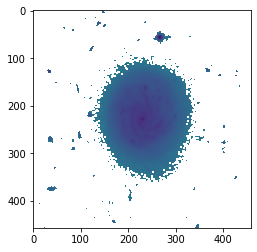

In [28]:
plt.figure()
plt.imshow(mag_r_to_Ha)

In [29]:
np.sum(np.isnan(mag_r_to_Ha))

93670

In [32]:
testtran = filter_transformation(telescope,rfilter, gr_col)
np.sum(np.isnan(testtran))

0

Nans are arising when I convert data_r to mag_r b/c there are negative values in the r-band image (sky is already subtracted).





In [38]:
print("number of nans in mag_r = ",np.sum(np.isnan(mag_r)))
print("number of nans in data_r = ",np.sum(np.isnan(data_r)))
print("number of negs in data_r = ",np.sum(data_r < 0))

number of nans in mag_r =  93670
number of nans in data_r =  0
number of negs in data_r =  93670


I'm going to try to implement an approach where the images are scaled to the same ZP.  The default value is in the r-band image header.

In [40]:
rhdu[0].header['FLTRATIO']

0.03216995298862457

In [48]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/subtract_continuum.py VFID0569-NGC5989-INT-20190530-p002

['legacy/VFID0569-legacy-151-r-ha.fits']
g-r image = legacy/VFID0569-legacy-151-gr-ha-smooth.fits
found g-r image.  not remaking this
telescope =  INT VFID0569-NGC5989-INT-20190530-p002

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18


# Compare 2 versions of CS images

In [49]:
cs1_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS.fits'
cs2_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS-gr.fits'

cs1 = fits.getdata(cs1_file)
cs2 = fits.getdata(cs2_file)

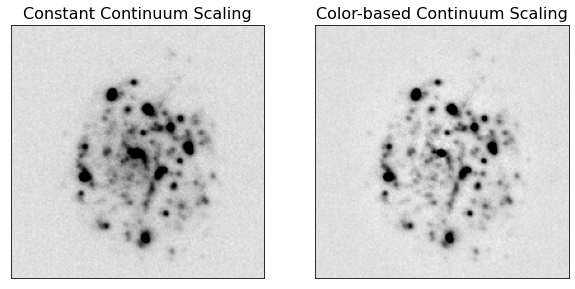

In [76]:
cs1_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS.fits'
cs2_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS-gr.fits'

cs1 = fits.getdata(cs1_file)
cs2 = fits.getdata(cs2_file)

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.01)
center = 230
delta = 100
xmin = center - delta
xmax = center + delta
images = [cs1,cs2]
titles = ["Constant Continuum Scaling","Color-based Continuum Scaling"]
for i,cs in enumerate(images):
    plt.subplot(1,2,i+1)
    plt.imshow(cs,vmin=-0.015,vmax=.1,cmap='gray_r')
    plt.title(titles[i],fontsize=16)
    plt.axis([xmin,xmax,xmin,xmax])
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('VFID0569-NGC5989-CS-test.png')

In [77]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/get_gr_cont_phot.py VFID0569-NGC5989-INT-20190530-p002

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
testing: colname =  LOG_SFR_HA_FLAG
detect objects


TypeError: __init__() got an unexpected keyword argument 'mask'

<Figure size 640x480 with 0 Axes>

In [92]:
from scipy.stats import scoreatpercentile
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from astropy.visualization import SqrtStretch, PercentileInterval
from astropy.visualization import ImageNormalize
from astropy.visualization import LinearStretch,SinhStretch


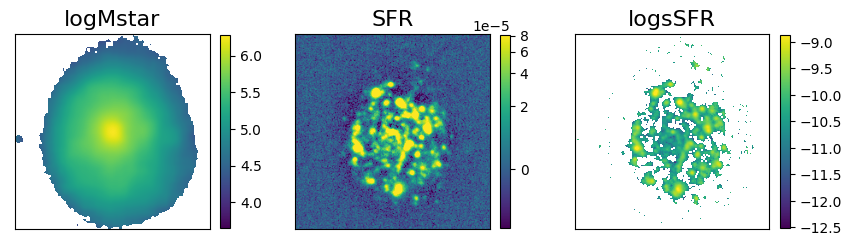

In [105]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
im1_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-logmstar-vr.fits'
im2_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-sfr-vr.fits'
im3_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-ssfr.fits'

cs1 = fits.getdata(im1_file)
cs2 = fits.getdata(im2_file)
cs3 = fits.getdata(im3_file)

xsize,ysize = cs1.shape
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

center = xsize//2
delta = xsize//4
xmin = center - delta
xmax = center + delta
images = [cs1,cs2,cs3]
titles = ["logMstar","SFR",'logsSFR']
percentile1 = .5
percentile2 = 99.5
stretch=['linear','asinh','linear']
for i,cs in enumerate(images):
    plt.subplot(1,3,i+1)
    norm = simple_norm(cs, stretch=stretch[i],max_percent=percentile2,min_percent=percentile1)

    plt.imshow(cs, norm=norm,origin='lower')#,vmin=v1,vmax=v2)
    #plt.imshow(cs)#,vmin=-0.015,vmax=.1)#,cmap='gray_r')
    plt.colorbar(fraction=.045)
    plt.title(titles[i],fontsize=16)
    plt.axis([xmin,xmax,xmin,xmax])
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('VFID0569-NGC5989-mstar-sfr.png')

In [107]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
from PIL import Image
galdir = 'VFID0569-NGC5989-INT-20190530-p002/'
legacy_jpg = glob.glob(galdir+'legacy/*.jpg')[0]
print("legacy jpg = ",legacy_jpg)
jpeg_data = Image.open(legacy_jpg)

legacy jpg =  VFID0569-NGC5989-INT-20190530-p002/legacy/VFID0569-legacy-151.jpg


In [109]:
jpeg_data.size

(151, 151)

In [111]:
cs.shape

(458, 458)

# Making CS Images for Gianluca

* Gianluca needs sSFR images for the galaxies that have resolved CO images.

PGC25063 = VFID2822

IC4336 = VFID2140

NGC6186  = VFID3574


In [118]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

## PGC25063 = VFID2822


Observed once with INT on 2019-02-06

In [115]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
!rsync --exclude "mastDownload" -avz draco:/data-pool/Halpha/halphagui-output-20240104/cutouts/VFID2822* .

receiving incremental file list
rsync: [sender] link_stat "/data-pool/Halpha/halphagui-output-20240104/cutouts/VFID2882*" failed: No such file or directory (2)

sent 26 bytes  received 7 bytes  22.00 bytes/sec
total size is 0  speedup is 0.00
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1668) [Receiver=3.1.2]
rsync: [Receiver] write error: Broken pipe (32)


In [119]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/subtract_continuum.py VFID2822-FBQSJ085533.2+311242-INT-20190206-p018 

['legacy/VFID2822-legacy-59-r-ha.fits']
g-r image = legacy/VFID2822-legacy-59-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting 0.00 from r-band image
Subtracting 0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID2822-legacy-59-gr-ha-smooth.fits
telescope =  INT VFID2822-FBQSJ085533.2+311242-INT-20190206-p018

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18


INT 20190206 p018 VFID2822-FBQSJ085533.2+311242
legacy jpg =  legacy/VFID2822-legacy-59.jpg


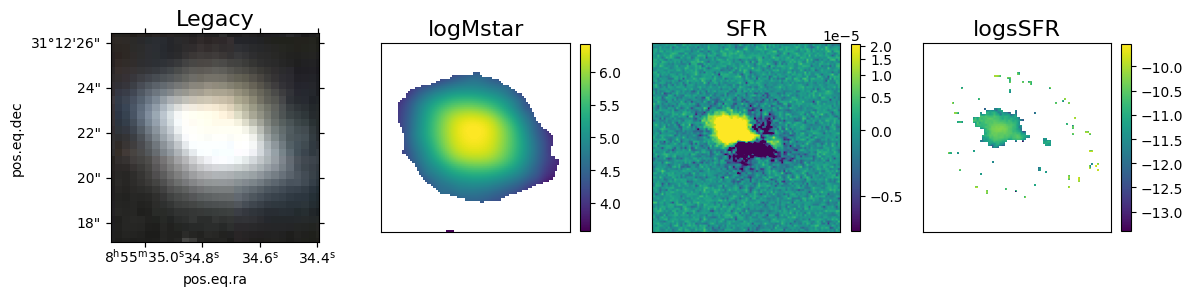

In [120]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# adding zero after command to not zoom
%run ~/github/havirgo/python/make_mstar_image.py VFID2822-FBQSJ085533.2+311242-INT-20190206-p018 

INT 20190206 p018 VFID2822-FBQSJ085533.2+311242
legacy jpg =  legacy/VFID2822-legacy-59.jpg


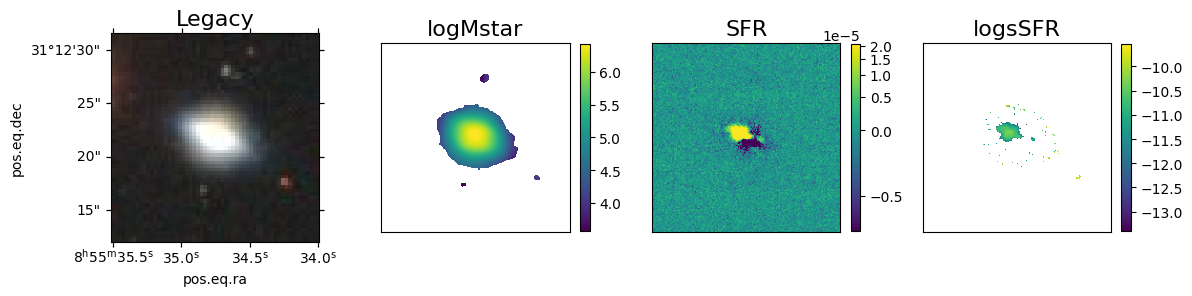

In [121]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# adding zero after command to not zoom
%run ~/github/havirgo/python/make_mstar_image.py VFID2822-FBQSJ085533.2+311242-INT-20190206-p018  0

['legacy/VFID2822-legacy-59-r-ha.fits']
g-r image = legacy/VFID2822-legacy-59-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting 0.00 from r-band image
Subtracting 0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID2822-legacy-59-gr-ha-smooth.fits
telescope =  INT VFID2822-FBQSJ085533.2+311242-INT-20190206-p018

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
INT 20190206 p018 VFID2822-FBQSJ085533.2+311242
legacy jpg =  legacy/VFID2822-legacy-59.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(89.13514523146242, 90.23973676761302) 89.13514523146242 89.13514523146242 90.23973676761302 90.23973676761302
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.148+/-0.

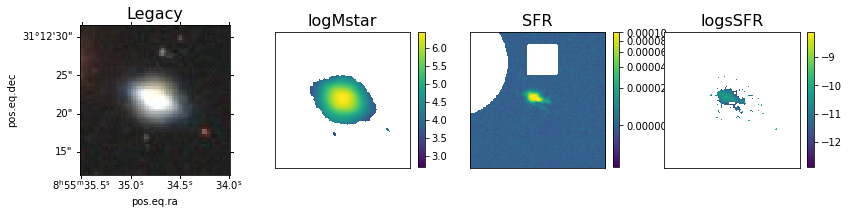

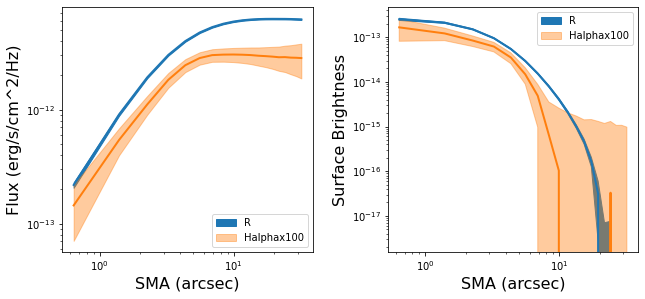

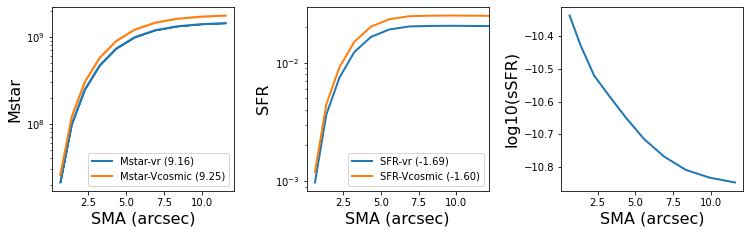

In [70]:
# image is oversubtracted, so I am adjusted the continuum

os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID2822-FBQSJ085533.2+311242-INT-20190206-p018'
scalefactor = 0.94

%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 0
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname

## IC4336 = VFID2140


Observed once with BOK and twice with HDI!

In [132]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
!rsync --exclude "mastDownload" -avz draco:/data-pool/Halpha/halphagui-output-20240104/cutouts/VFID2140* .

receiving incremental file list
VFID2140-IC4336-BOK-20220424-VFID2162/
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-CS-GAL-phot.fits
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-CS-phot.fits
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-CS.fits
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-CS_phot.dat
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-Ha.fits
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-R-1Comp-fit.log
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-R-1Comp-galfit-out.fits
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-R-1Comp-galfit.01
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-R-GAL-phot.fits
VFID2140-IC4336-BOK-20220424-VFID2162/VFID2140-IC4336-BOK-20220424-VFID2162-R-enclosed-flux.png
VFID2140-IC4336-B

['legacy/VFID2140-legacy-282-r-ha.fits']
g-r image = legacy/VFID2140-legacy-282-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting 0.00 from r-band image
Subtracting 0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID2140-legacy-282-gr-ha-smooth.fits
telescope =  BOK VFID2140-IC4336-BOK-20220424-VFID2162

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
BOK 20220424 VFID2162 VFID2140-IC4336
legacy jpg =  legacy/VFID2140-legacy-282.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(313.7374621215165, 315.1679736270189) 313.7374621215165 313.7374621215165 315.1679736270189 315.1679736270189
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.335+/-0.033
getting asym

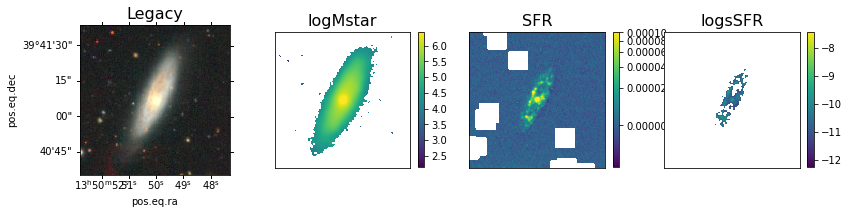

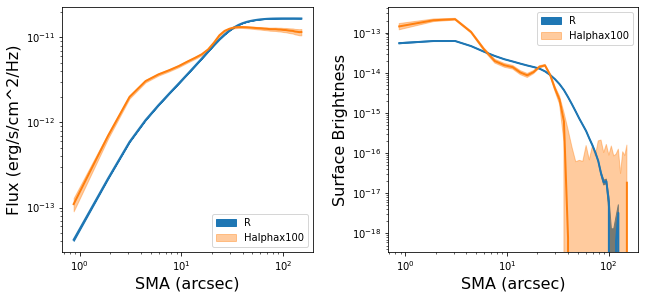

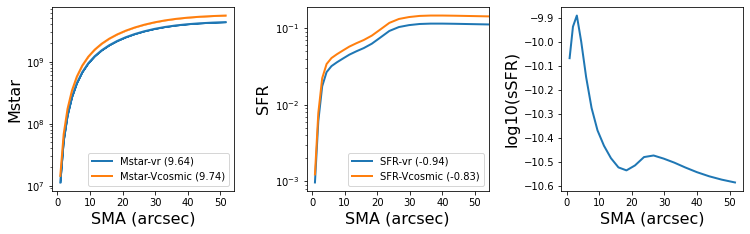

In [69]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID2140-IC4336-BOK-20220424-VFID2162'
scalefactor = .88

%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname

['legacy/VFID2140-legacy-282-r-ha.fits']
g-r image = legacy/VFID2140-legacy-282-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting 0.00 from r-band image
Subtracting 0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID2140-legacy-282-gr-ha-smooth.fits
telescope =  HDI VFID2140-IC4336-HDI-20170522-p014

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
HDI 20170522 p014 VFID2140-IC4336
legacy jpg =  legacy/VFID2140-legacy-282.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(334.17742151738275, 336.11894261361505) 334.17742151738275 334.17742151738275 336.11894261361505 336.11894261361505
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.349+/-0.026
getting asym f

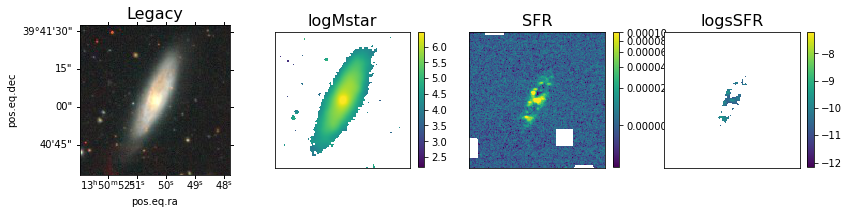

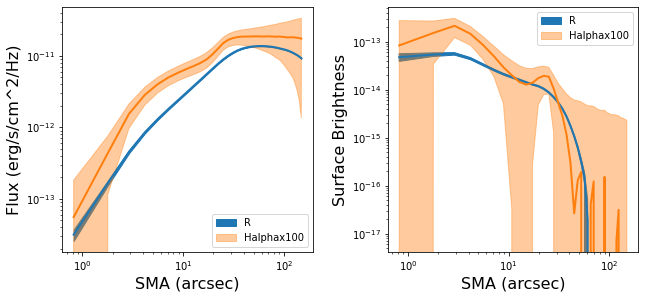

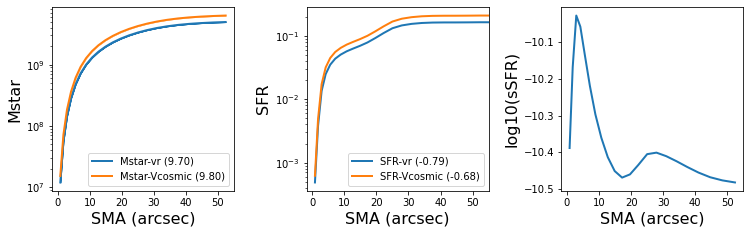

In [68]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID2140-IC4336-HDI-20170522-p014'
scalefactor = 1.02


%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname

['legacy/VFID2140-legacy-282-r-ha.fits']
g-r image = legacy/VFID2140-legacy-282-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting 0.00 from r-band image
Subtracting 0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID2140-legacy-282-gr-ha-smooth.fits
telescope =  HDI VFID2140-IC4336-HDI-20170522-p012

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
HDI 20170522 p012 VFID2140-IC4336
legacy jpg =  legacy/VFID2140-legacy-282.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(334.3048199171411, 335.617394089699) 334.3048199171411 334.3048199171411 335.617394089699 335.617394089699
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.353+/-0.029
getting asym for image2

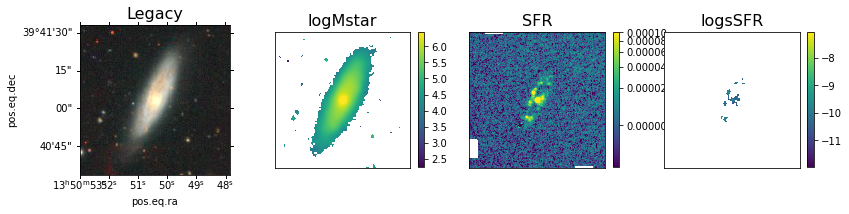

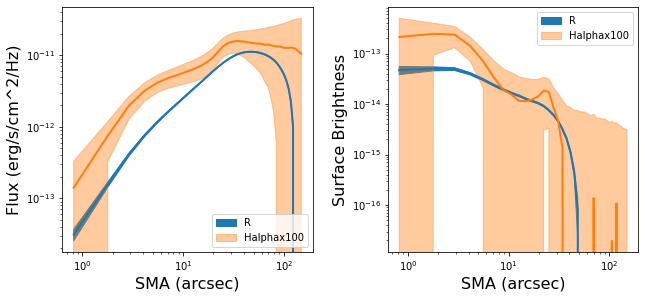

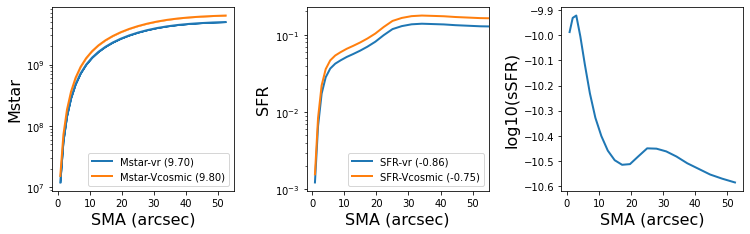

In [67]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID2140-IC4336-HDI-20170522-p012'
scalefactor = 1.07

%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
 

## NGC6186  = VFID3574


Observed once with HDI on 2020-02-29

In [158]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
!rsync --exclude "mastDownload" -avz draco:/data-pool/Halpha/halphagui-output-20240104/cutouts/VFID3574* .

receiving incremental file list
VFID3574-NGC6186-HDI-20200229-p080/
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-CS-GAL-phot.fits
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-CS-phot.fits
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-CS.fits
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-CS_phot.dat
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-Ha.fits
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-R-1Comp-fit.log
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-R-1Comp-galfit-out.fits
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-R-1Comp-galfit.01
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-R-GAL-phot.fits
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-R-enclosed-flux.png
VFID3574-NGC6186-HDI-20200229-p080/VFID3574-NGC6186-HDI-20200229-p080-R-galfit.i

['legacy/VFID3574-legacy-260-r-ha.fits']
g-r image = legacy/VFID3574-legacy-260-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting -0.00 from r-band image
Subtracting -0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID3574-legacy-260-gr-ha-smooth.fits
telescope =  HDI VFID3574-NGC6186-HDI-20200229-p080

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
HDI 20200229 p080 VFID3574-NGC6186
legacy jpg =  legacy/VFID3574-legacy-260.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.231+/-0.047
getting asym 

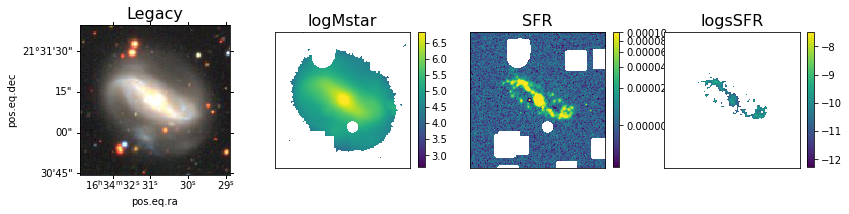

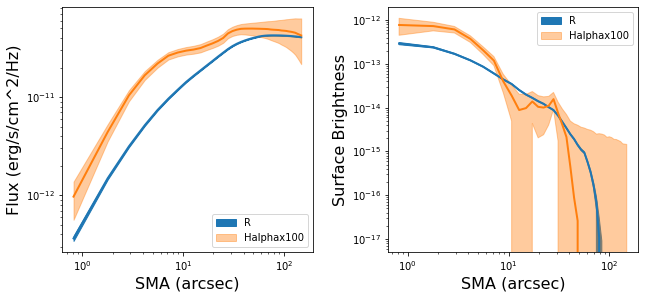

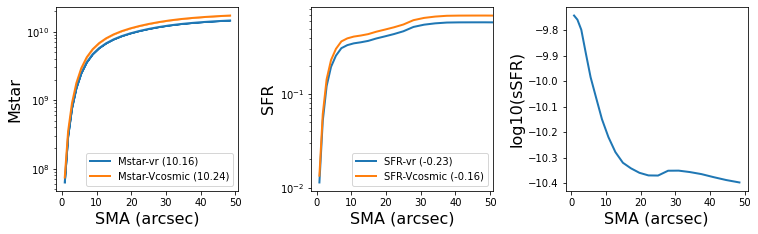

In [71]:
# going back to 20 pix convolution, which is what Matteo used

# changed convolution in g-r image from 20 pixels to 10 to see if the oversubraction in the center
# improves
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
scalefactor = .94

%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
 

# Development Code Below

['legacy/VFID3574-legacy-260-r-ha.fits']
g-r image = legacy/VFID3574-legacy-260-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting -0.00 from r-band image
Subtracting -0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID3574-legacy-260-gr-ha-smooth.fits
telescope =  HDI VFID3574-NGC6186-HDI-20200229-p080

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
HDI 20200229 p080 VFID3574-NGC6186
legacy jpg =  legacy/VFID3574-legacy-260.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.231+/-0.047
getting asym 

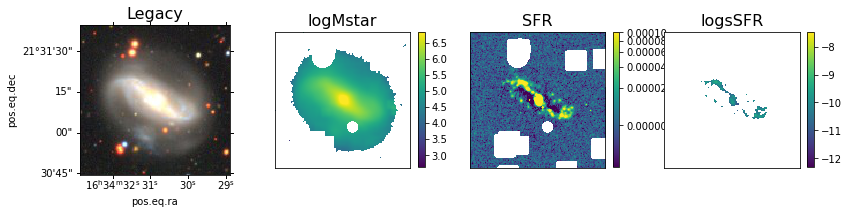

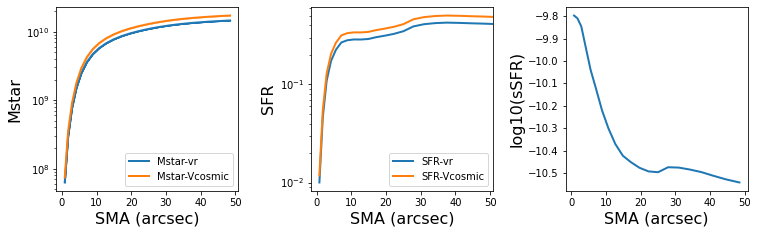

In [61]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
scalefactor = 1

%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
  

['legacy/VFID3574-legacy-260-r-ha.fits']
g-r image = legacy/VFID3574-legacy-260-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting -0.00 from r-band image
Subtracting -0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID3574-legacy-260-gr-ha-smooth.fits
telescope =  HDI VFID3574-NGC6186-HDI-20200229-p080

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
HDI 20200229 p080 VFID3574-NGC6186
legacy jpg =  legacy/VFID3574-legacy-260.jpg


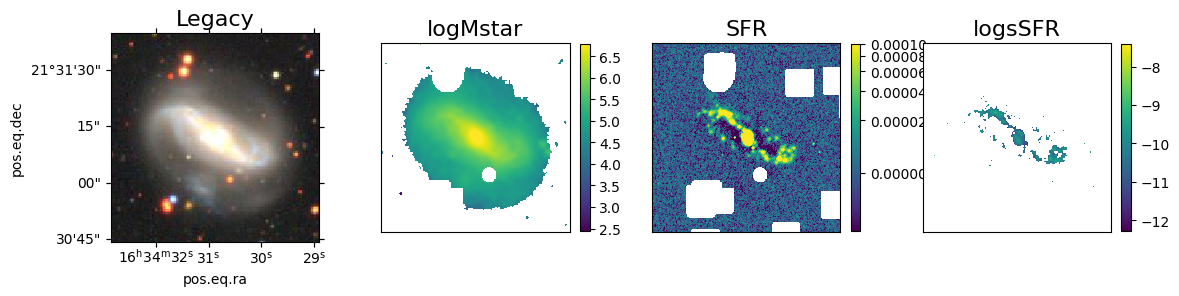

In [226]:
# changed convolution in g-r image from 20 pixels to 10 to see if the oversubraction in the center
# improves
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
scalefactor = 1
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 

In [2]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname

/home/rfinn/anaconda3/lib/python3.7/site-packages/ginga/cmap.py:13316: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  for name in _cm.cmap_d:
/home/rfinn/anaconda3/lib/python3.7/site-packages/ginga/mplw/ImageViewMpl.py:40: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rc['keymap.all_axes'] = []       # enable all axes


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.231+/-0.047
getting asym for image2
asymmetry = 1.477+/-0.053
running statmorph - please be patient...



/home/rfinn/github/halphagui/photwrapper.py:1261: RuntimeWarning: invalid value encountered in log10
  self.sb1_mag_sqarcsec = self.magzp - 2.5*np.log10(self.sb1/self.pixel_scale**2)
/home/rfinn/github/halphagui/photwrapper.py:1262: RuntimeWarning: invalid value encountered in log10
  self.sb1_mag_sqarcsec_err = self.sb1_mag_sqarcsec - (self.magzp - 2.5*np.log10((self.sb1 + self.sb1_err)/self.pixel_scale**2))
/home/rfinn/github/halphagui/photwrapper.py:1275: RuntimeWarning: invalid value encountered in log10
  self.sb2_mag_sqarcsec = self.magzp2 - 2.5*np.log10(self.sb2/self.pixel_scale**2)
/home/rfinn/github/halphagui/photwrapper.py:1286: RuntimeWarning: invalid value encountered in log10
  self.sb2b_mag_sqarcsec = self.magzp2 - 2.5*np.log10(conversion*self.sb2/self.pixel_scale**2)


writing tables
photometry outfile =  VFID3574-NGC6186-HDI-20200229-p080-R_phot.fits
r sky noise =  4.876544631048688e-16
ha sky noise =  5.556232308273955e-17

finished with photutils

4.876544631048688e-16
5.556232308273955e-17


/home/rfinn/anaconda3/lib/python3.7/site-packages/photutils/segmentation/catalog.py:2504: RuntimeWarning: invalid value encountered in less
  mask = (circ_radius < min_radius)
/home/rfinn/anaconda3/lib/python3.7/site-packages/photutils/segmentation/catalog.py:2504: RuntimeWarning: invalid value encountered in less
  mask = (circ_radius < min_radius)


petrosian radius = 38.42 arcsec (max = 148.91)
petrosian radius = 18.17 arcsec (max = 148.91)

In write_sky, skynoise =  48.76544631048687 5.556232308273954


/home/rfinn/github/halphagui/fit_profile.py:312: RuntimeWarning: invalid value encountered in greater
  if sum(sb > iphot) == 0:
/home/rfinn/github/halphagui/fit_profile.py:315: RuntimeWarning: invalid value encountered in less
  elif sum(sb < iphot) == 0:
/home/rfinn/github/halphagui/fit_profile.py:318: RuntimeWarning: invalid value encountered in greater
  a = funca(np.where(sb > iphot))
/home/rfinn/github/halphagui/fit_profile.py:319: RuntimeWarning: invalid value encountered in less
  b = funcb(np.where(sb < iphot))


In [ ]:
pip freeze

In [7]:
!ls -lth $dir/ |more

/bin/sh: 1: cannot open built-in: No such file


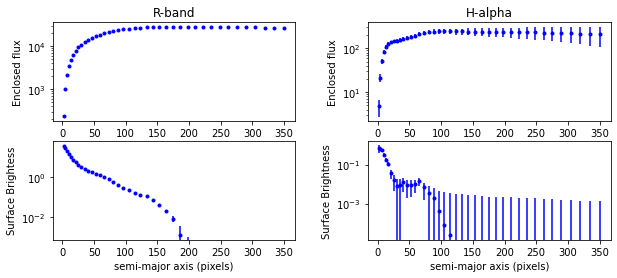

In [3]:
%matplotlib inline
otab.e.plot_profiles()

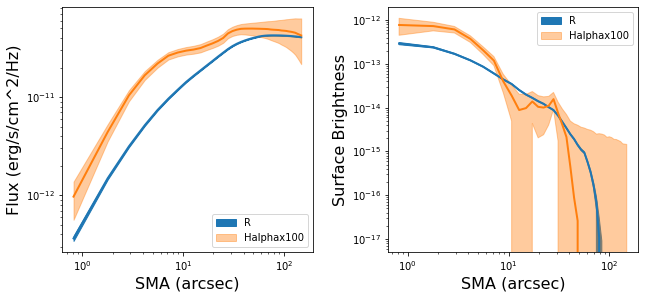

In [4]:
%matplotlib inline
otab.e.plot_fancy_profiles()

got here!
detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot


/home/rfinn/anaconda3/lib/python3.7/site-packages/photutils/segmentation/catalog.py:705: RuntimeWarning: invalid value encountered in less
  mask = ~np.isfinite(self._convolved_data) | (self._convolved_data < 0)


get frac masked pixels
calc sb
writing phot fits tables

finished with photutils

detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot


/home/rfinn/anaconda3/lib/python3.7/site-packages/photutils/segmentation/catalog.py:705: RuntimeWarning: invalid value encountered in less
  mask = ~np.isfinite(self._convolved_data) | (self._convolved_data < 0)


get frac masked pixels
calc sb
writing phot fits tables

finished with photutils

detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot
get frac masked pixels
calc sb
writing phot fits tables

finished with photutils

detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot
get frac masked pixels
calc sb
writing phot fits tables

finished with photutils

detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot


/home/rfinn/anaconda3/lib/python3.7/site-packages/photutils/segmentation/catalog.py:705: RuntimeWarning: invalid value encountered in less
  mask = ~np.isfinite(self._convolved_data) | (self._convolved_data < 0)


get frac masked pixels
calc sb
writing phot fits tables

finished with photutils



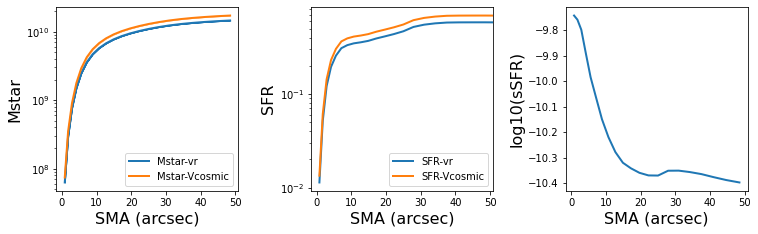

In [54]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
%matplotlib inline
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
plt.show()

In [52]:
def plot_profiles(subdirname):
    
    mstar1 = subdirname+'-logmstar-vr_phot.fits'
    mstar2 = subdirname+'-logmstar-vcosmic_phot.fits'

    sfr1 = subdirname+'-sfr-vr_phot.fits'
    sfr2 = subdirname+'-sfr-vcosmic_phot.fits'

    ssfr = subdirname+'-ssfr_phot.fits'

    tables = [mstar1,mstar2,sfr1,sfr2,ssfr]
    isubplot = [1,1,2,2,3]
    icolor = [0,1,0,1,0]    
    labels = ['Mstar-vr','Mstar-Vcosmic','SFR-vr','SFR-Vcosmic','sSFR']


    fig = plt.figure(figsize=(12,3))
    plt.subplots_adjust(left=.15,bottom=.1,right=.95,top=.95,wspace=.4)


    alphas = [1,.4,.6,.4,.6]
    for i,t in enumerate(tables[:-1]):
        ptab = Table.read(t)
        x = ptab['sma_arcsec']
        y0 = ptab['flux']
        yerr = ptab['flux_err']
        y1 = y0+yerr
        y2 = y0-yerr
        
        plt.subplot(1,3,isubplot[i])

        if i < 2:
            plt.fill_between(x,y1,y2,alpha=alphas[i],color=mycolors[icolor[i]])
        # also plot line because you can't see the result when the error is small
        # this should fix issue #18 in Virgo github
        plt.plot(x,y0,'-',label=labels[i],lw=2,color=mycolors[icolor[i]])
        if i == 0:
            xmin,xmax = plt.xlim()
        else:
            plt.xlim(xmin,xmax)
        plt.xlabel('SMA (arcsec)',fontsize=16)
        plt.ylabel(labels[i].split('-')[0],fontsize=16)
        #plt.gca().set_yscale('log')
        #plt.gca().set_xscale('log')
        plt.legend(loc='lower right')
        plt.gca().set_yscale('log')
   
    # add subplot from mstar and sfr profiles
    plt.subplot(1,3,3)
    mstartab = Table.read(tables[0])
    sfrtab = Table.read(tables[2])
    y0 = sfrtab['flux']/mstartab['flux']
    i += 1
    plt.plot(x,np.log10(y0),'-',lw=2,color=mycolors[0])
    plt.xlim(xmin,xmax)
    plt.ylabel('log10(sSFR)',fontsize=16)
    plt.xlabel('SMA (arcsec)',fontsize=16)
    #plt.gca().set_yscale('log')
   
    outname = subdirname+'-mstar-sfr-profiles.png'
    plt.savefig(outname)



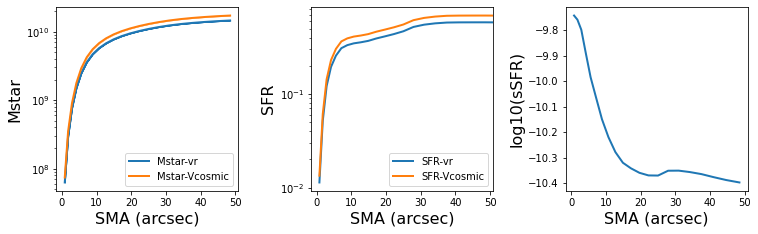

In [53]:
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
#subdir = homedir+'/research/Virgo-dev/cont-sub-gr'+
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr/'+dirname)
plot_profiles(dirname)

os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')


# all of the galaxies for Gianluca


['legacy/VFID3574-legacy-260-r-ha.fits']
g-r image = legacy/VFID3574-legacy-260-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting -0.00 from r-band image
Subtracting -0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID3574-legacy-260-gr-ha-smooth.fits
telescope =  HDI VFID3574-NGC6186-HDI-20200229-p080

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
HDI 20200229 p080 VFID3574-NGC6186
STD cut in SF image = 1.135e-05
legacy jpg =  legacy/VFID3574-legacy-260.jpg
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central
find ellipse guess
(307.43265351961725, 305.2012885164908) 307.43265351961725 307.43265351961725 305.2012885164908 305.2012885164908
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmet

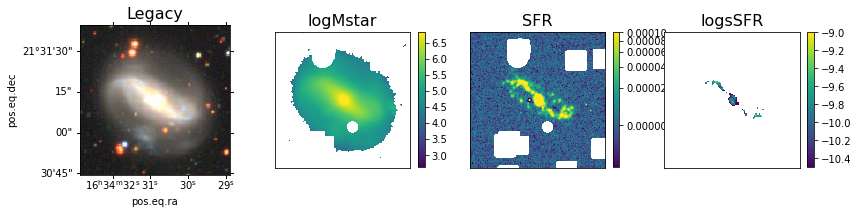

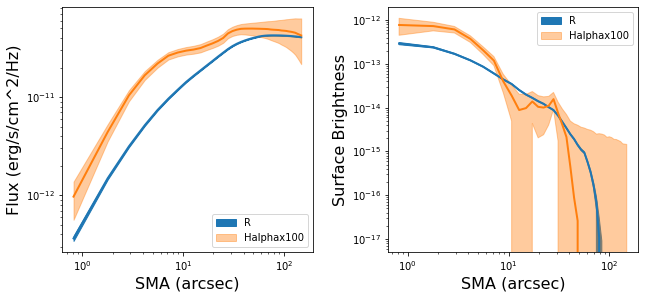

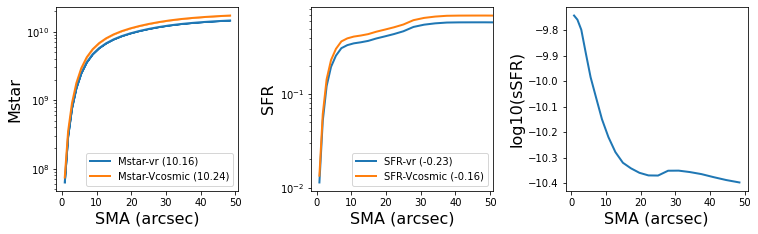

In [22]:
# this is all the commands to get new CS image and mstar/sfr/ssfr profiles
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID3574-NGC6186-HDI-20200229-p080'
scalefactor = .94
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname

%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
plt.show()

# Galaxies for NGC Group

* need to fix code to handle offcenter galaxies

* add SNR cut to the sSFR image
  * create object mask
  * calc std in remaining pixels
  * cut sSFR and SNR > 3
* [link to slides](https://docs.google.com/presentation/d/1DXOzvhq8jZzwO3-u1x7ts6d-fUNfM42bwe1AlhGKusA/edit?usp=sharing) on NGC 5364 Group

### Members

|VFID|	NED Name|
|------|------|
|VFID5889|	NGC 5364|
|VFID5892|	NGC 5360|
|VFID5851|	NGC 5363|
|VFID5842|	NGC 5356|
|VFID5855|	NGC 5348|
|VFID5868|	SDSSJ|
|VFID5844|	SDSSJ|
|VFID5859|	WISEJ|
|VFID5879|	SDSSJ|

### VFID5855-NGC5348

* mask is shit on this one b/c of egdge of INT CCDs

* need to redo the mask, but also need to feed in objparams


* and here is more code from halphagui

```python
        ephot = Table.read(ephot_fname)

        
        #self.radius_arcsec = ephot['SMA_SB24']

        bad_sb25 = ephot['SMA_SB25'] == 0

        self.radius_arcsec = ephot['SMA_SB25']*(~bad_sb25) + 1.35*ephot['SMA_SB24']*bad_sb25
        # OK, I know what you are thinking, I can't possibly be changing this again...

        # use SMA_SB25 instead of SB24 - this should work better for both high and low SB galaxies
        # if SMA_SB25 is not available use 1.35*SMA_SB24

        # for galaxies with SMA_SB24=0, set radius to value in main table 
        noradius_flag = self.radius_arcsec == 0
        self.radius_arcsec[noradius_flag] = self.vf.cat['radius'][noradius_flag]

        # also save BA and PA from John's catalog
        # use the self.radius_arcsec for the sma
        self.BA = np.ones(len(self.radius_arcsec))
        self.PA = np.zeros(len(self.radius_arcsec))
        
        self.BA[~noradius_flag] = ephot['BA_MOMENT'][~noradius_flag]
        self.PA[~noradius_flag] = ephot['PA_MOMENT'][~noradius_flag]
        
        self.RA = self.vf.cat['RA']
        self.DEC = self.vf.cat['DEC']        
```

* then the parameters get stored as objparams
```
self.objparams = [self.defcat.cat['RA'][self.igal],self.defcat.cat['DEC'][self.igal],mask_scalefactor*self.radius_arcsec[self.igal],self.BA[self.igal],self.PA[self.igal]+90]
```

## input for maskwrapper.py

```
usage: maskwrapper.py [-h] [--image IMAGE] [--haimage HAIMAGE]
                      [--sepath SEPATH] [--gaiapath GAIAPATH]
                      [--config CONFIG] [--objra OBJRA] [--objdec OBJDEC]
                      [--objsma OBJSMA] [--objBA OBJBA] [--objPA OBJPA]
                      [--auto]

Run gui for making an mask. You can specify the RA and DEC of galaxy, which is
useful if galaxy is not at the center of the cutout image. You can also
provide an elliptical region around the galaxy to unmask. This is useful for
galaxies that are shredded by source extractor.

optional arguments:
  -h, --help           show this help message and exit
  --image IMAGE        r-band image
  --haimage HAIMAGE    this is typically the continuum-subtracted Halpha
                       image. If no image is provided, the middle panel is
                       left blank.
  --sepath SEPATH      path to source extractor config files (e.g.
                       ~/github/HalphaImaging/astromatic/ - this is default if
                       no path is given.)
  --gaiapath GAIAPATH  full pathname of gaia mask file from legacy dr9.
  --config CONFIG      source extractor config file. default is
                       default.sex.HDI.mask
  --objra OBJRA        RA of target galaxy. default is none, then object is
                       assumed to be at center of image.
  --objdec OBJDEC      DEC of target galaxy
  --objsma OBJSMA      SMA of elliptical region to unmask around galaxy.
  --objBA OBJBA        BA of elliptical region to unmask around galaxy.
  --objPA OBJPA        PA of elliptical region to unmask around galaxy,
                       measure CCW from +x axis
  --auto               set this to run the masking software automatically. the
                       default is false, meaning that the gui window will open
                       for interactive use.

```


In [28]:
%run ~/github/Virgo/programs/readtablesv2.py

In [36]:
vfid = 'VFID5855'
flag = v.main['VFID'] == vfid
matchindex = np.arange(len(v.main))[flag][0]
print(sum(flag),matchindex)

ra = v.main['RA'][matchindex]
dec = v.main['DEC'][matchindex]
objsma = v.ephot['SMA_SB25'][matchindex]
ba = v.ephot['BA_MOMENT'][matchindex]
pa = v.ephot['PA_MOMENT'][matchindex] +90

commandstr = f"--objra {ra:.6f} --objdec {dec:.5f} --objsma {objsma:.1f} --objBA {ba:.1f} --objPA {pa:.1f}"
print(commandstr)

1 5855
--objra 208.546919 --objdec 5.22729 --objsma 179.7 --objBA 0.2 --objPA 266.7


['legacy/VFID5855-legacy-682-r-ha.fits']
g-r image = legacy/VFID5855-legacy-682-gr-ha-smooth.fits

In get_gr 
Computing median values for g and r images
Subtracting -0.00 from r-band image
Subtracting -0.00 from g-band image
Smoothing images for color calculation
writing g-r color image to legacy/VFID5855-legacy-682-gr-ha-smooth.fits
telescope =  INT VFID5855-NGC5348-INT-20190206-p120

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18
INT 20190206 p120 VFID5855-NGC5348
STD cut in SF image = 8.305e-07
legacy jpg =  legacy/VFID5855-legacy-682.jpg
got here!
detect objects
find central

getting object position from RA and DEC


comparing xcenter 1025.7 and from ra 1029.8
comparing ycenter 1016.2 and from dec 1030.3

find ellipse guess

comparing xcenter 1025.7 and from ra 1029.8
comparing ycenter 1016.2 and from dec 1030.3

<Figure size 432x288 with 0 Axes>

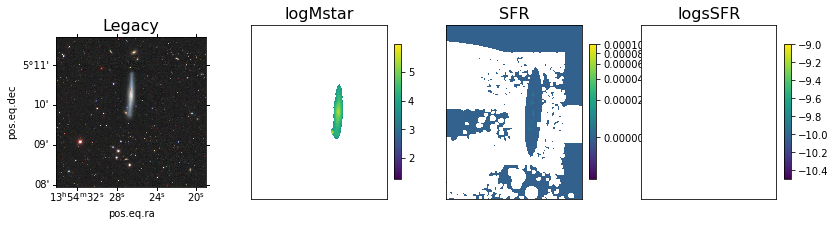

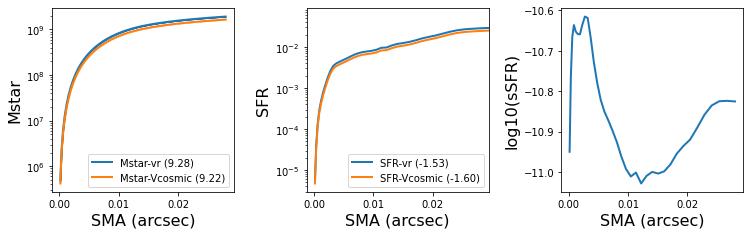

In [15]:
# this is all the commands to get new CS image and mstar/sfr/ssfr profiles
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
scalefactor = 1
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 0

#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname

%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
plt.show()

## VFID5889-NGC5364

* I screwed up the mask on this one - need to remake it


In [12]:
%run ~/github/Virgo/programs/readtablesv2.py
vfid = 'VFID5889'
flag = v.main['VFID'] == vfid
matchindex = np.arange(len(v.main))[flag][0]
print(sum(flag),matchindex)

ra = v.main['RA'][matchindex]
dec = v.main['DEC'][matchindex]
objsma = v.ephot['SMA_SB25'][matchindex]
ba = v.ephot['BA_MOMENT'][matchindex]
pa = v.ephot['PA_MOMENT'][matchindex] +90

commandstr = f"--objra {ra:.6f} --objdec {dec:.5f} --objsma {objsma:.1f} --objBA {ba:.1f} --objPA {pa:.1f}"
print(commandstr)

1 5889
--objra 209.049890 --objdec 5.01466 --objsma 310.0 --objBA 0.6 --objPA 118.7


In [13]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr/VFID5889-NGC5364-INT-20190206-p120')
%run ~/github/halphagui/maskwrapper --image VFID5889-NGC5364-INT-20190206-p120-R.fits --auto --objra 209.049890 --objdec 5.01466 --objsma 310.0 --objBA 0.6 --objPA 118.7

testing - unmaskellipse =  True
VFID5889-NGC5364-INT-20190206-p120-R.fits
None
(3302, 2471) (3302, 2471)
using a deblending threshold =  0.005
sex VFID5889-NGC5364-INT-20190206-p120-R.fits -c default.sex.HDI.mask -CATALOG_NAME VFID5889-NGC5364-INT-20190206-p120-R.cat -CATALOG_TYPE FITS_1.0 -DEBLEND_MINCONT 0.005 -DETECT_THRESH 10 -ANALYSIS_THRESH 10 -CHECKIMAGE_NAME VFID5889-NGC5364-INT-20190206-p120-R-segmentation.fits -DETECT_MINAREA 5
['source_id', 'ra', 'dec', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error', 'radius', 'xpixel', 'ypixel']
['source_id', 'ra', 'dec', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error', 'radius', 'xpixel', 'ypixel']
mask value =  621.0
star 0: 1552.8,1035.1,17.1
star 1: 1988.0,1069.2,22.0
star 2: 1995.8,1451.1,34.3
star 3: 1335.7,933.7,18.6
star 4: 1476.4,762.0,28.3
star 5: 1212.9,920.7,13.3
star 6: 2154.3,1449.1,20.2
star 7: 1619.6,1797.2,17.7
s

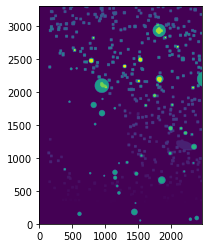

In [14]:
maskfile = 'VFID5889-NGC5364-INT-20190206-p120-R-mask.fits'
dat = fits.getdata(maskfile)
plt.figure()
plt.imshow(dat,origin="lower")

# Mask dev for VFID5889-NGC5364

* looking for a more robust way to detect objects...



RA,DEC =  209.0498895 5.0146562
testing: colname =  LOG_SFR_HA_FLAG
detect objects
find central

getting object position from RA and DEC


comparing xcenter 702.6 and from ra 692.9
comparing ycenter 1523.8 and from dec 1524.2

find ellipse guess

comparing xcenter 702.6 and from ra 692.9
comparing ycenter 1523.8 and from dec 1524.2

(702.5986504550887, 1523.7790274895858) 702.5986504550887 702.5986504550887 1523.7790274895858 1523.7790274895858
measure phot
get M20
get frac masked pixels
calc sb
convert units
get asym
asymmetry = 0.325+/-0.006
getting asym for image2
asymmetry = 3.905+/-0.007
running statmorph - please be patient...

writing tables
photometry outfile =  VFID5889-NGC5364-INT-20190206-p120-R_phot.fits
r sky noise =  2.7851318156384504e-16
ha sky noise =  2.784261826324525e-17

finished with photutils

2.7851318156384504e-16
2.784261826324525e-17
petrosian radius = 189.61 arcsec (max = 417.34)
petrosian radius = 98.90 arcsec (max = 417.34)
isophotal radius uncertain for i

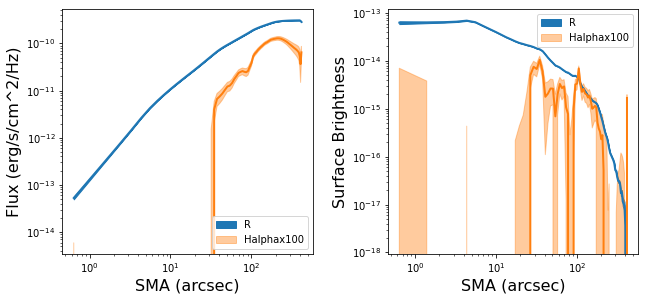

In [11]:
# this is all the commands to get new CS image and mstar/sfr/ssfr profiles
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5889-NGC5364-INT-20190206-p120'
scalefactor = .94
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 0
plt.show()
#os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
plt.show()

In [3]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr/VFID5855-NGC5348-INT-20190206-p120/')
imfile = 'VFID5855-NGC5348-INT-20190206-p120-R.fits'
hdu = fits.open(imfile)

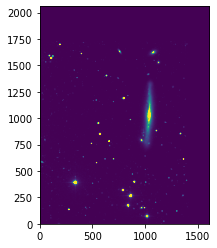

In [4]:
plt.figure()
imdat = hdu[0].data
plt.imshow(imdat,vmin=0,vmax=2.5,origin="lower")

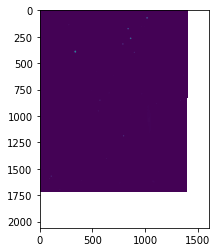

In [5]:
flag = imdat == 0
maskedim = np.ma.array(imdat,mask=flag)
plt.imshow(maskedim)

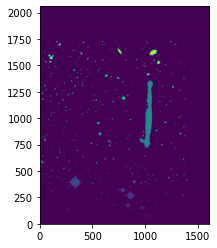

In [9]:
from astropy.stats import sigma_clipped_stats


from photutils.segmentation import SegmentationImage
from photutils.segmentation import detect_sources
from photutils.background import Background2D, MedianBackground

bkg_estimator = MedianBackground()

bkg = Background2D(imdat,(50, 50),filter_size=(3, 3), bkg_estimator=bkg_estimator)
threshold = 3 * bkg.background_rms
segment_map = detect_sources(imdat, threshold, npixels=10)

plt.figure()
plt.imshow(segment_map, origin='lower')